
# Regression

## Install packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 7.4MB 86kB/s  eta 0:00:01  5% |█▊                              | 399kB 6.5MB/s eta 0:00:02    34% |███████████                     | 2.5MB 19.4MB/s eta 0:00:01    76% |████████████████████████▌       | 5.7MB 24.7MB/s eta 0:00:01
    100% |████████████████████████████████| 12.2MB 52kB/s  eta 0:00:01  4% |█▋                              | 604kB 26.6MB/s eta 0:00:01    50% |████████████████▏               | 6.1MB 26.8MB/s eta 0:00:01    61% |███████████████████▉            | 7.5MB 28.2MB/s eta 0:00:01    73% |███████████████████████▍        | 8.9MB 27.8MB/s eta 0:00:01    83% |██████████████████████████▉     | 10.2MB 22.6MB/s eta 0:00:01    93% |██████████████████████████████  | 11.4MB 24.0MB/s eta 0:00:01
    100% |████████████████████████████████| 26.2MB 23kB/s  eta 0:00:01    29% |█████████▍                      | 7.7MB 23.5MB/s eta 0:00:01    39% |████████████▌                   | 10.2MB 26.8MB/s eta 0:00:01    52% |████████████████▉        

In [1]:
import pandas as pd
import numpy as np
import os
import helper
import quiz_tests
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Simulate two stock prices


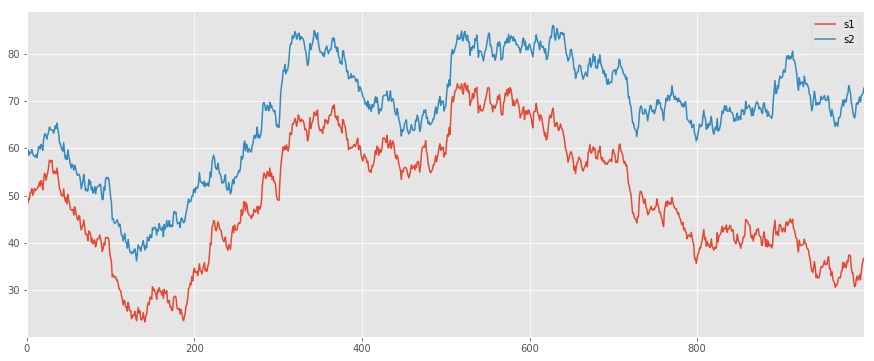

In [3]:
# just set the seed for the random number generator
np.random.seed(100)
# use returns to create a price series
drift = 100
r0 = pd.Series(np.random.normal(0, 1, 1000))
s0 = pd.Series(np.cumsum(r0), name='s0') + drift

noise1 = np.random.normal(0, 0.4, 1000)
drift1 = 50
r1 = r0 + noise1
s1 = pd.Series(np.cumsum(r1), name='s1') + drift1

noise2 = np.random.normal(0, 0.4, 1000)
drift2 = 60
r2 = r0 + noise2
s2 = pd.Series(np.cumsum(r2), name='s2') + drift2

pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

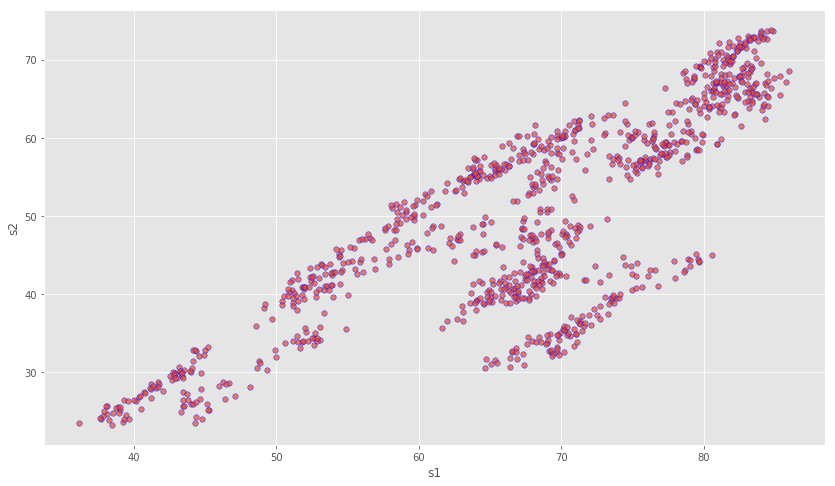

In [4]:
## Plot data with scatterplot
sc = plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.7)
plt.xlabel('s1')
plt.ylabel('s2');

In [5]:
from sklearn.linear_model import LinearRegression

## Quiz: Linear Regression

Note that the LinearRegression().fit() expects 2D numpy arrays.  Since s1 and s2 are pandas series, we can use Series.values to get the values as a numpy array. Since these are 1D arrays, we can use numpy.reshape(-1,1) to make these 1000 row by 1 column 2 dimensional arrays.  

The coefficients of the linear regression, $\beta$ and $intercept$ for the regression line:  
$y = \beta \times x + intercept$  
Can be obtained after fitting to the data.  Use `LinearRegression.coef_[0][0]` for the slope and `LinearRegression.intercept_[0]` for the intercept.

In [7]:
def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()
    #TODO: get the values from each series, reshape to be 2 dimensional
    #set s1 to the x variable, s2 to the y variable
    xVar = xSeries.values.reshape(-1,1)
    yVar = ySeries.values.reshape(-1,1)
    
    #TODO: call LinearRegression.fit().  Pass in the x variable then y variable
    a = lr.fit(xVar,yVar)

    print(a)
    #TODO: obtain the slope and intercept
    slope = 0
    intercept = 1
    
    return (slope, intercept)

quiz_tests.test_regression_slope_and_intercept(regression_slope_and_intercept);

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


TypeError: 'LinearRegression' object does not support indexing

In [ ]:
slope, intercept = regression_slope_and_intercept(s1,s2);
print(f"slope {slope:.2f} and intercept {intercept:.2f}")

### Plot the fitted regression line over the scatterplot

In [ ]:
plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.5);
x = np.linspace(s1.min()-5, s1.max()+5, 2)
yPred = slope * x + intercept
plt.plot(yPred,x, alpha=0.2, lw=3, color='r')
plt.xlabel('s1')
plt.ylabel('s2');

If you're stuck, you can also check out the solution [here](regression_solution.ipynb)